In [ ]:
! python -m pip install tensorflow==2.16.2 keras

In [7]:
import tensorflow

In [9]:
import pandas

students = pandas.read_csv("student_habits_performance.csv")

students.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [104]:
x1 = students["age"]
x2 = students["gender"].map({"Female": 1, "Male": -1, "Other": 0})
x3 = students["study_hours_per_day"]
x4 = students["social_media_hours"]
x5 = students["netflix_hours"]
x6 = students["part_time_job"].map({"Yes": -1, "No": 1})
x7 = students["attendance_percentage"]
x8 = students["sleep_hours"]
x9 = students["diet_quality"].map({"Good": 1, "Fair": 0, "Poor": -1})
x10 = students["exercise_frequency"]
x11 = students["parental_education_level"].map({"Bachelor": 1, "High School": 0, "Master": -1}).fillna(0)
x12 = students["internet_quality"].map({"Good": 1, "Average": 0, "Poor": -1})
x13 = students["mental_health_rating"]
x14 = students["extracurricular_participation"].map({"Yes": 1, "No": -1})

X = pandas.DataFrame([
    x1, x2, x3, x4, x5,
    x6, x7, x8, x9, x10,
    x11, x12, x13, x14
]).T

X.to_csv("students.csv", index=False)

print(X.isna().sum(axis=0))

X

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
dtype: int64


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation
0,23.0,1.0,0.0,1.2,1.1,1.0,85.0,8.0,0.0,6.0,-1.0,0.0,8.0,1.0
1,20.0,1.0,6.9,2.8,2.3,1.0,97.3,4.6,1.0,6.0,0.0,0.0,8.0,-1.0
2,21.0,-1.0,1.4,3.1,1.3,1.0,94.8,8.0,-1.0,1.0,0.0,-1.0,1.0,-1.0
3,23.0,1.0,1.0,3.9,1.0,1.0,71.0,9.2,-1.0,4.0,-1.0,1.0,1.0,1.0
4,19.0,1.0,5.0,4.4,0.5,1.0,90.9,4.9,0.0,3.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21.0,1.0,2.6,0.5,1.6,1.0,77.0,7.5,0.0,2.0,0.0,1.0,6.0,1.0
996,17.0,1.0,2.9,1.0,2.4,-1.0,86.0,6.8,-1.0,1.0,0.0,0.0,6.0,1.0
997,20.0,-1.0,3.0,2.6,1.3,1.0,61.9,6.5,1.0,5.0,1.0,1.0,9.0,1.0
998,24.0,-1.0,5.4,4.1,1.1,-1.0,100.0,7.6,0.0,0.0,1.0,0.0,1.0,-1.0


In [107]:
y1 = students["exam_score"] < 70
y2 = students["exam_score"] >= 70

Y = pandas.DataFrame([y1, y2]).T.astype(int)

Y

,exam_score,exam_score
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
995,0,1
996,1,0
997,1,0
998,1,0


In [178]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.Input(shape=(X.shape[1],)),
    tensorflow.keras.layers.Dense(512, activation="relu"),
    # tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(64, activation="relu"),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(2, activation="softmax")
])

model.compile(
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
    loss=tensorflow.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 512)            │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,642 (158.76 KB)

 Trainable params: 40,642 (158.76 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
model.fit(X, Y, batch_size=100, epochs=1000)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0552  
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0288 
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9964 - loss: 0.0163 
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0132 
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9956 - loss: 0.0123 
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9971 - loss: 0.0082 
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9974 - loss: 0.0084 
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0040     
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0079 
Epoch 10/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0055 
Epoch 11/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0033 
Epoch 12/1000
13/13 ━━━━━━━━━━━━━━━━

In [188]:
Yp = pandas.DataFrame(model.predict(X)).astype(int)

Yp

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step


,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,1,0



Accuracy:    0.90
Precision:   1.00
Recall:      0.79
Specificity: 0.83
F1-score:    0.88



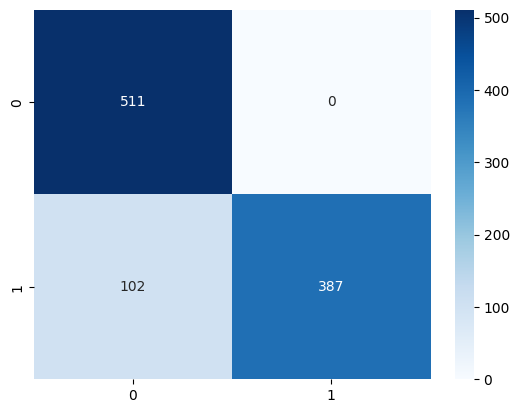

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn

mat = confusion_matrix(Y.iloc[:, 0], Yp.iloc[:, 0])

seaborn.heatmap(mat, cmap="Blues", annot=True, fmt=".0f")

tn, fp, fn, tp = mat.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"""
Accuracy:    {accuracy:.2f}
Precision:   {precision:.2f}
Recall:      {recall:.2f}
Specificity: {specificity:.2f}
F1-score:    {f1:.2f}
""")


Accuracy:    0.89
Precision:   1.00
Recall:      0.78
Specificity: 0.81
F1-score:    0.88



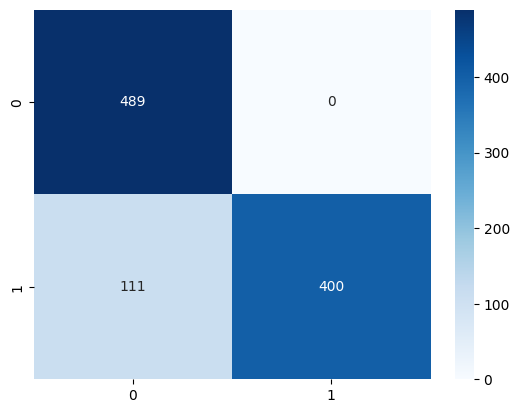

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn

mat = confusion_matrix(Y.iloc[:, 1], Yp.iloc[:, 1])

seaborn.heatmap(mat, cmap="Blues", annot=True, fmt=".0f")

tn, fp, fn, tp = mat.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"""
Accuracy:    {accuracy:.2f}
Precision:   {precision:.2f}
Recall:      {recall:.2f}
Specificity: {specificity:.2f}
F1-score:    {f1:.2f}
""")

In [194]:
model.save("students.keras")

In [195]:
model = tensorflow.keras.models.load_model("students.keras")
model

<Sequential name=sequential_24, built=True>

In [196]:
X.loc[4]

age                              19.0
gender                            1.0
study_hours_per_day               5.0
social_media_hours                4.4
netflix_hours                     0.5
part_time_job                     1.0
attendance_percentage            90.9
sleep_hours                       4.9
diet_quality                      0.0
exercise_frequency                3.0
parental_education_level         -1.0
internet_quality                  1.0
mental_health_rating              1.0
extracurricular_participation    -1.0
Name: 4, dtype: float64

In [197]:
X.loc[4:4].values

array([[19. ,  1. ,  5. ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. ,
         1. ,  1. , -1. ]])

In [198]:
model.predict(pandas.DataFrame([
    [19. ,  1. ,  5. ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  0. ,  5. ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  -1. ,  5. ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  1. ,  5.6 ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  0. , 5.6 ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  -1. , 5.6 ,  4.4,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  1. ,  5. ,  3.6,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  0. ,  5. ,  3.6,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
    [19. ,  -1. ,  5. ,  3.6,  0.5,  1. , 90.9,  4.9,  0. ,  3. , -1. , 1. ,  1. , -1.],
])).round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[1.   , 0.   ],
       [0.981, 0.019],
       [0.897, 0.103],
       [0.92 , 0.08 ],
       [0.309, 0.691],
       [0.009, 0.991],
       [0.696, 0.304],
       [0.555, 0.445],
       [0.306, 0.694]], dtype=float32)